## HW 1

In [1]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')

### Data preprocessing

In [46]:
df1 = pd.read_csv('./data/2015.csv')  
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

So we can see that in this table, columns: 'Dystopia Residual', 'Generosity', 'Trust (Government Corruption)' , 'Freedom', 'Health (Life Expectancy)', 'Family', 'Economy (GDP per Capita)', 'Standard Error' have type float.  
Colunm 'Happiness Rank' has type int.  
And columns 'Region', 'Country' have type object(string).  
There are no missing(null) values in any column.


Remove unnecessary columns and add column Date. For convenience, move the Date column to the first place

In [5]:
def drop_and_add_cols(df, drop_cols, year):
    df.drop(drop_cols, axis=1, inplace=True)
    df['Date'] = year
    df['Date'] = pd.to_datetime(df.Date, format='%Y')
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

In [6]:
df1 = drop_and_add_cols(df1, ['Standard Error', 'Happiness Rank', 'Dystopia Residual'], 2015)

As a result, we got such  data set

In [7]:
df1.head()

,Date,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015-01-01,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015-01-01,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015-01-01,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015-01-01,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015-01-01,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


We will do similar transformations with the data sets for the years 2016-2019. Then we are going to merge them all in one.

In [8]:
df2 = pd.read_csv('./data/2016.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [9]:
df2 = drop_and_add_cols(df2, ['Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'], 2016)

In [10]:
df3 = pd.read_csv('./data/2017.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

Since later we plan on merging our tables in one, the names of the columns must be the same in all data sets. That is why we rename the colums in the tables 3,4,5.

In [11]:
columns = {'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
           'Health..Life.Expectancy.': 'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)', 
           'Trust..Government.Corruption.':'Trust (Government Corruption)'
          }
df3 = df3.rename(columns=columns)

In [12]:
df3 = drop_and_add_cols(df3, ['Happiness.Rank', 'Dystopia.Residual', 'Whisker.high', 'Whisker.low'], 2017)

In [13]:
df4 = pd.read_csv('./data/2018.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [14]:
columns = {'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)',
          'Social support': 'Family', 'Healthy life expectancy': 'Health (Life Expectancy)', 
          'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)'}
df4 = df4.rename(columns=columns)

In [15]:
df4 = drop_and_add_cols(df4, 'Overall rank', 2018)

In [16]:
df4.head()

,Date,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,2018-01-01,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018-01-01,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018-01-01,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018-01-01,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018-01-01,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [17]:
df5 = pd.read_csv('./data/2019.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [18]:
df5 = df5.rename(columns=columns)

In [19]:
df5 = drop_and_add_cols(df5, 'Overall rank', 2019)

In [20]:
df5.head()

,Date,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,2019-01-01,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019-01-01,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019-01-01,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019-01-01,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019-01-01,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Now we will find those countries that are present in all 5 data sets. In each data set, we will leave information only about these countries. Then merge the tables.


In [21]:
from functools import reduce
dfs = [df1['Country'], df2['Country'], df3['Country'], df4['Country'], df5['Country']]
countries = reduce(lambda left, right: pd.merge(left, right), dfs)

In [22]:
def new_cols(df, num, countries):
    df = df.merge(countries).sort_values('Country')
    if (num >= 3):
        df['Region'] = df1['Region']
        cols = df.columns.tolist()
        cols = cols[0:1] + cols[1:2] + cols[-1:] + cols[2:-1]
        df = df[cols]
    return df

In [23]:
df1 = new_cols(df1, 1, countries)
df2 = new_cols(df2, 2, countries)
df3 = new_cols(df3, 3, countries)
df4 = new_cols(df4, 4, countries)
df5 = new_cols(df5, 5, countries)
df_all = pd.concat([df1, df2, df3, df4, df5])

### Descriptive statistics

Let's group the data by region and look at some aggregates.

In [24]:
df_region = df_all.groupby(['Date', 'Region']).agg({
    'Happiness Score': ['mean', 'median', 'std', 'max', 'min'],
    'Economy (GDP per Capita)': ['mean'],
    'Family': ['mean'],
    'Freedom': ['mean']
})
df_region = df_region.sort_values(['Date', ('Happiness Score', 'mean')], ascending=False)
df_region

Happiness Score                    \
                                                      mean  median       std   
Date       Region                                                              
2019-01-01 North America                          7.271000  7.2710  0.306884   
           Australia and New Zealand              7.262000  7.2620  0.022627   
           Western Europe                         6.732350  6.9075  0.789418   
           Latin America and Caribbean            6.142150  6.1780  0.659646   
           Eastern Asia                           5.671250  5.6960  0.510437   
           Central and Eastern Europe             5.466429  5.5350  0.536170   
           Southeastern Asia                      5.431250  5.5270  0.866301   
           Middle East and Northern Africa        5.419737  5.3390  0.953914   
           Southern Asia                          4.681857  4.6810  0.665673   
           Sub-Saharan Africa                     4.256129  4.3320  0.609154   
2018-01-01 Australia and New Zealand              7.293000  7.2930  0.029698   
           North America                          7.226000  7.2260  0.369110   
           Western Europe                         6.706250  6.8500  0.778724   
           Latin America and Caribbean            6.101850  6.1540  0.661875   
           Eastern Asia                           5.646000  5.6925  0.518541   
           Central and Eastern Europe             5.423643  5.4980  0.548271   
           Southeastern Asia                      5.385375  5.4935  0.877330   
           Middle East and Northern Africa        5.378105  5.3470  0.964638   
           Southern Asia                          4.625143  4.5710  0.649808   
           Sub-Saharan Africa                     4.186226  4.1900  0.611672   
2017-01-01 Australia and New Zealand              7.284000  7.2840  0.000000   
           North America                          7.223000  7.2230  0.347896   
           Western Europe                         6.686600  6.7885  0.764121   
           Latin America and Caribbean            6.101000  6.0925  0.682343   
           Eastern Asia                           5.572250  5.6200  0.506637   
           Central and Eastern Europe             5.379321  5.3705  0.567117   
           Southeastern Asia                      5.355250  5.3655  0.962326   
           Middle East and Northern Africa        5.345579  5.2620  0.971994   
           Southern Asia                          4.574571  4.5450  0.618962   
           Sub-Saharan Africa                     4.143968  4.0810  0.594500   
2016-01-01 Australia and New Zealand              7.323500  7.3235  0.014849   
           North America                          7.254000  7.2540  0.212132   
           Western Europe                         6.731400  6.9180  0.780620   
           Latin America and Caribbean            6.050500  6.0760  0.765282   
           Eastern Asia                           5.477000  5.5400  0.484432   
           Southeastern Asia                      5.396750  5.2965  0.977487   
           Middle East and Northern Africa        5.386053  5.3030  1.057559   
           Central and Eastern Europe             5.379607  5.5025  0.599237   
           Southern Asia                          4.563286  4.6430  0.616190   
           Sub-Saharan Africa                     4.074839  4.1210  0.531874   
2015-01-01 Australia and New Zealand              7.285000  7.2850  0.001414   
           North America                          7.273000  7.2730  0.217789   
           Western Europe                         6.739350  6.9385  0.813051   
           Latin America and Caribbean            6.137300  6.1265  0.765359   
           Eastern Asia                           5.496250  5.5620  0.575281   
           Southeastern Asia                      5.372625  5.3795  1.000077   
           Central and Eastern Europe             5.344571  5.3575  0.577396   
           Middle East and Northern Africa 

From 2015 to 2018, Australia and New Zealand ranked the first in terms of happiness. However, in 2019 North America managed to take the first place. In spite of the fact that the first 4 places over the course of 5 years were occupied by the countries of Western Europe, this region is only at the third place in terms of the average indicator of happiness. Perhaps this is due to the fact that this region is quite large. It includes countries with very different living standards. Also we can take into account the level of standard deviation in Western Europe. It is quite large, which proves our assumption.

### Build plots

In [47]:
fig = px.line(df_all.iloc[1::3,:], 
        title='Happiness Score',
        x='Country', 
        y='Happiness Score',
        color='Date')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y = 1.02,
        x = 1,
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

This chart shows the ranking based on level of happiness for various countries. Let's take a closer look at some of the countries with interesting indicators. We can see that in Syria, the level of happiness dropped dramatically since 2016. Perhaps this is caused by the civil war. Russian military intervention in the Syrian Civil War began in September 2015, after an official request by the Syrian government for military aid against rebel groups.
Another interesting case is Venezuela. In 2016, inflation in this country reached 800%, the reason is probably again the civil war. Accordingly, the level of happiness in the society has been decreasing every year since 2015

In [28]:
fig = px.line(df_all.iloc[2::3,:], 
        title='Economy (GDP)',
        x='Country', 
        y='Economy (GDP per Capita)',
        color='Date')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
        y = 1.02,
        x = 1,
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

This diagram shows the level of significance of the indicator 'Economy (GDP per Capita)' in different countries. You can note that this factor is much higher in UAE than in other countries. This is logical because the economy is actively developing here due to the oil production. In countries with a low level of economic development this factor is less important.

Let's make a table in which for each country we will take factor that contribute the most in evaluating the happiness in country. Each factor is assigned a number in any order

In [29]:
df_importance = pd.DataFrame(df_all.iloc[:,4:].idxmax(axis="columns"))
df_importance['Country'] = df_all['Country']
df_importance['Date'] = df_all['Date']

df_importance = df_importance.rename(columns={0:'most important factor'})

df_importance.loc[df_importance['most important factor'] == 'Family', 'most important factor'] = 1
df_importance.loc[df_importance['most important factor'] == 'Economy (GDP per Capita)', 'most important factor'] = 2
df_importance.loc[df_importance['most important factor'] == 'Freedom', 'most important factor'] = 3
df_importance.loc[df_importance['most important factor'] == 'Health (Life Expectancy)', 'most important factor'] = 4
df_importance.loc[df_importance['most important factor'] == 'Generosity', 'most important factor'] = 5
df_importance.loc[df_importance['most important factor'] == 'Trust (Government Corruption)', 'most important factor'] = 6
 
df_importance

,most important factor,Country,Date
135,5,Afghanistan,2015-01-01
85,2,Albania,2015-01-01
62,1,Algeria,2015-01-01
28,1,Argentina,2015-01-01
112,1,Armenia,2015-01-01
...,...,...,...
101,1,Venezuela,2019-01-01
88,1,Vietnam,2019-01-01
137,1,Yemen,2019-01-01
126,1,Zambia,2019-01-01


In [30]:
import plotly.graph_objects as go


def drow(year):
    fig = go.Figure()
    
    fig.add_trace(go.Bar(name = year,
        x=df_importance[df_importance['Date'] == year]['Country'],
        y=df_importance[df_importance['Date'] == year]['most important factor']))
    
    fig.update_layout(title = 'Most important factor ' + year)
    fig.update_xaxes(tickangle=45)
    fig.update_yaxes(ticktext=["Family", "Economy", "Freedom", 'Health', 'Generosity'],
                tickvals=[1, 2, 3, 4, 5])
    return fig
    
    
fig1 = drow('2015-01-01')
fig2 = drow('2017-01-01')
fig3 = drow('2019-01-01')

fig1.show()
fig2.show()
fig3.show()

This histogram shows the most important factor in evaluating happiness in a country. As we can see, from year to year there are more and more countries for which the family factor makes the greatest contribution to happiness. Only in some Arab countries the economic factor remains the most important

## HW 2 Predictive models and quality estimation

### Step 0. Define a problem task  
Let's make a prediction of  happiness score in countries for 2019. 

We need to solve the **regression problem**. In other words, we need to predict a specific real value in range from 1.85 to 10.  
We solve this problem using the linear regression model. 

### Linear Regression Model Representation  
Linear regression is an attractive model because the representation is so simple. The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). Simple regression problem (a single x and a single y), the form of the model would be: $$ y = {w_0} + {w_1}x$$ 
### How will we select the coefficients $w_{i}$?  
We will minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. $$ MSE = \sum_{i=1}^{N} \frac{(y_{i} - y^{p}_{i})}{N} $$ where $y_{i}$ - observed target, $y^{p}_{i}$ - predicted target

### Step 1. Define predictors and target values


In [31]:
df_all =  df_all.sort_values(['Date', 'Country'])
df_all['Country_num'] = df_all['Country'].factorize(sort=True)[0]
df_all['Region'] = df_all['Region'].factorize(sort=True)[0]

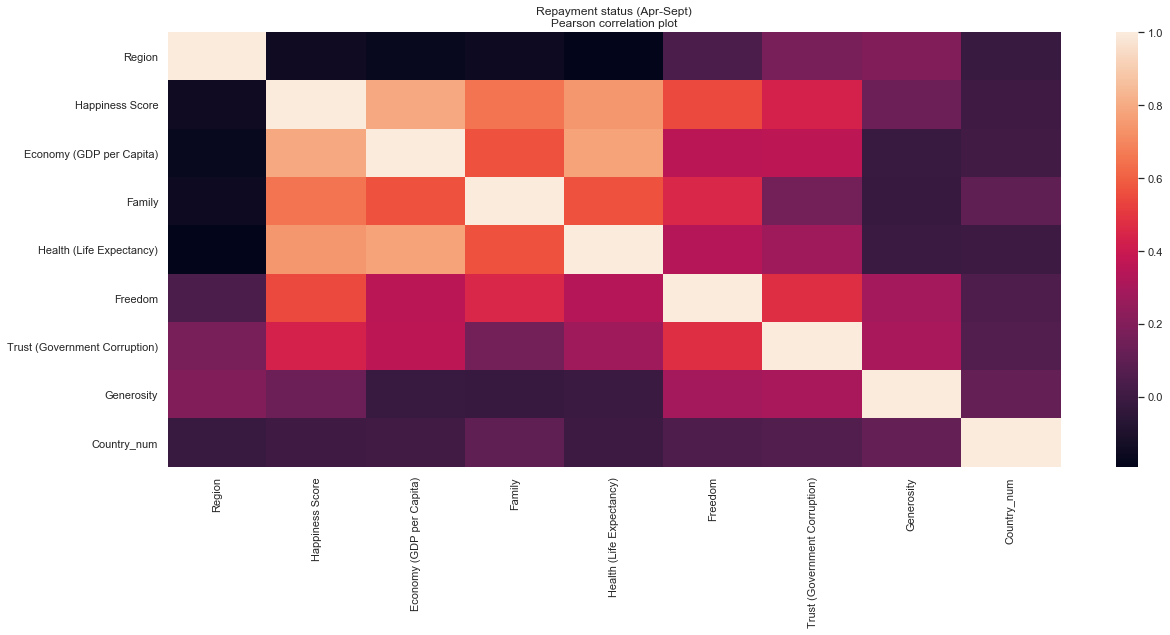

In [32]:
cols = list(df_all.columns)
plt.title('Repayment status (Apr-Sept)\nPearson correlation plot')
corr = df_all[cols].corr()
sns.heatmap(corr);

### Feature selection  
We will not use featires 'Economy (GDP per Capita)' , 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)' ,'Generosity' and 'Dystopia Residual', because If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


### Step 2. Split data in train and test set

In [35]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.metrics import mean_absolute_error
import numpy as np

In [37]:
X_train = np.array(df_all['Happiness Score'][:141*3]) 
y_train = np.array(df_all['Happiness Score'][141*3:141*4]) 
X_test = np.array(df_all['Happiness Score'][141:141*4]) 
y_test = np.array(df_all['Happiness Score'][141*4:]) 

### Step 3. Select a model and train it & Make predictions for unseen data

In [38]:
model = lm.LinearRegression()
y_pred = []
n_countries = 141
for country in range(n_countries):
    model.fit(X_train[country::141].reshape(-1,3), y_train[country::141].reshape(-1,1))
    y_pred.append(model.predict(X_test[country::141].reshape(-1,3))[0][0])

### Step 4. Estimate the quality

We will evaluate the quality of the model using metric Symmetric mean absolute percentage error (SMAPE).  

SMAPE is an accuracy measure based on percentage (or relative) errors. It is usually defined as follows: $$ SMAPE = \frac{100%}{N}\sum_{i=1}^{N} \frac{|y^{p}_{i} - y_{i}|}{(|y_{i}| + |y^{p}_{i}|)/2}$$

In [39]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [40]:
y_pred = np.array(y_pred)
print('SMAPE = {:.2f}'.format(smape(y_pred,y_test)))

SMAPE = 2.78


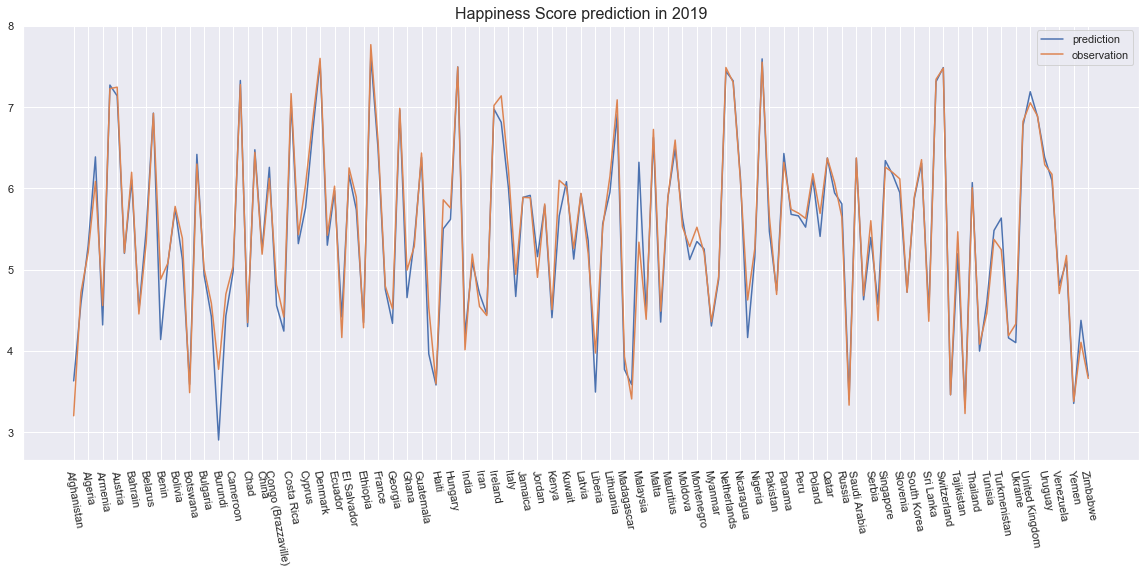

In [41]:
plt.plot(list(range(141)), y_pred, label='prediction')
plt.plot(list(range(141)), y_test, label='observation')
plt.xticks(list(range(141))[::2], df_all.Country.values[::2], rotation=-80)
plt.title('Happiness Score prediction in 2019', size=16)
plt.legend();

On this graph we can see that for many countries the predicted values are really close to the real ones. However, there are some countries in which predicted and real values are significantly different. For instance, Burundi, Liberia, Malaysia. Let's look at happiness scores in these states for different years and figure out why the prediction is incorrect.

In [42]:
df_all[df_all.Country == 'Burundi'][['Date', 'Country','Happiness Score']]

,Date,Country,Happiness Score
139,2015-01-01,Burundi,2.905
140,2016-01-01,Burundi,2.905
140,2017-01-01,Burundi,2.905
140,2018-01-01,Burundi,2.905
131,2019-01-01,Burundi,3.775


It can be seen from this table that during the period from 2015 to 2018 the level of happiness in the country was the same and only in 2019 it increased by 0,87 points. Given that the prediction is based on previous data, the predicted happiness score was 2.905

In [43]:
df_all[df_all.Country == 'Liberia'][['Date', 'Country','Happiness Score']]

,Date,Country,Happiness Score
103,2015-01-01,Liberia,4.571
133,2016-01-01,Liberia,3.622
134,2017-01-01,Liberia,3.533
135,2018-01-01,Liberia,3.495
129,2019-01-01,Liberia,3.975


We can see from the table that during the period from 2015 to 2018 the level of happiness in this country has been decreasing. However, it unexpectedly rose in 2019, thus, the model was unable to predict it because this increase was caused by some external factors which our model does not consider.

In [44]:
df_all[df_all.Country == 'Malaysia'][['Date', 'Country','Happiness Score']]

,Date,Country,Happiness Score
56,2015-01-01,Malaysia,5.770
42,2016-01-01,Malaysia,6.005
39,2017-01-01,Malaysia,6.084
33,2018-01-01,Malaysia,6.322
75,2019-01-01,Malaysia,5.339


The situation in Malasia is inverse. From 2015 to 2018 the level of happiness have been rising but in 2019 it unexpectedly fell.